<a href="https://colab.research.google.com/github/dharambirpoddar/RL_Bird/blob/main/DNN_Bird_controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Implementation

In [117]:
pip install numpy

In [118]:
pip install matplotlib

In [119]:
pip install tensorflow

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

**Converting GPS to XYZ**

In [121]:

def gps2xy(longitude,latitude):
  # Example Coordinates (Adjust these to your actual data)
  #latitude = 28.6129  # Example: Delhi, India
  #longitude = 77.2304

  # Define the source and target coordinate systems
  wgs84 = pyproj.CRS('EPSG:4326')  # Standard GPS coordinates

  # Determine UTM zone for your location in India
  # India covers multiple UTM zones (40-47)
  # Use a reference source (e.g., https://epsg.io/) to find the zone
  # for your specific coordinates. Here, we'll assume zone 46 for Delhi.
  utm_zone = 46

  # Construct the UTM CRS for India zone
  utm_crs = pyproj.CRS(f'EPSG:326{utm_zone}')

  # Create a transformation object
  transformer = pyproj.Transformer.from_crs(wgs84, utm_crs, always_xy=True)

  # Perform the transformation
  x, y = transformer.transform(longitude, latitude)

  #print(f"Indian UTM Coordinates (Zone {utm_zone}): X = {x:.2f}, Y = {y:.2f}")
  return [x,y]

In [122]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
import pandas as pd
df_raw=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/dataMain2.csv')
df_raw

,Seq,Stamp,TimeUS,Roll,Pitch,Yaw,Alt,Lat,Lng,C1_Roll,C2_Pitch,C3_Throttle,seq2,TimeUS2,GrX,GrY,GrZ,AcX,AcY,AcZ
0,198,17:34.2,179654476,45.08,-5.59,61.29,-12.06,22.555598,88.308273,1500,1500,987,176,179651838,-1.019486,0.031180,-0.764695,-0.897181,-7.478602,-7.713443
1,423,17:34.2,179697878,42.66,-4.62,60.23,-12.07,22.555598,88.308274,1500,1500,987,177,179651838,-1.059048,0.006570,-0.785094,-0.644817,-7.397454,-8.110314
2,649,17:34.3,179733964,40.29,-3.70,59.38,-12.07,22.555598,88.308274,1500,1500,987,282,179671952,-1.035036,0.020322,-0.694925,-0.791456,-8.410787,-8.229849
3,879,17:34.3,179774486,37.83,-2.72,58.68,-12.07,22.555598,88.308274,1500,1500,987,283,179671952,-1.068217,0.006879,-0.715840,-0.620993,-8.345556,-8.458950
4,1109,17:34.4,179841066,35.23,-1.15,58.16,-12.07,22.555598,88.308274,1500,1500,987,398,179693751,-1.121045,-0.015521,-0.610481,-0.423526,-8.455116,-8.509775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,40351,18:16.2,221678836,-2.14,1.72,24.72,-1.70,22.555625,88.308345,1507,1501,1740,11454,190294706,0.310023,0.938959,-0.187948,-1.212563,1.143817,-25.578570
1050,40386,18:16.3,221717811,-0.84,-1.76,19.31,-1.70,22.555625,88.308345,1508,1500,1731,11455,190314541,-0.486446,0.160412,-0.114451,3.222649,-0.365631,-33.076530
1051,40425,18:16.3,221758761,12.54,-2.35,14.11,-1.70,22.555625,88.308345,1508,1500,1724,11456,190314541,-0.443253,0.176483,-0.131657,4.018771,-0.280683,-31.800740
1052,40460,18:16.3,221796964,27.96,1.52,12.23,-1.70,22.555625,88.308345,1508,1500,1724,11488,190334519,-0.655319,-0.476875,0.071297,5.924641,0.018187,-25.114600


In [124]:
df = df_raw.dropna()
#gps2xy(df['Lat'],df['Lng'])

#gps2xy(df['Lat'])
xx=[]
yy=[]
for i in range(df.shape[0]):
  x=df['Lng'][i]
  y=df['Lat'][i]
  gps2xy(x,y)
  xx.append(gps2xy(x,y)[0])
  yy.append(gps2xy(x,y)[1])




Ploting

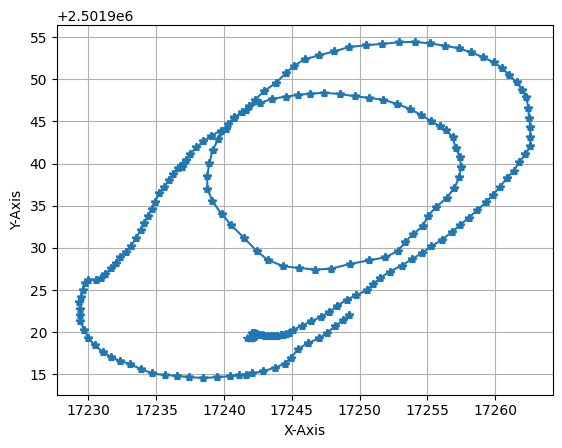

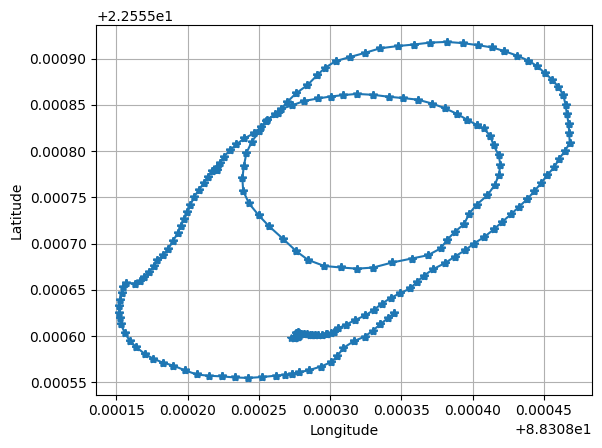

In [125]:
plt.plot(xx,yy,'*-')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.grid()
plt.show()
plt.plot(df['Lng'],df['Lat'],'*-')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

Make State Variabes

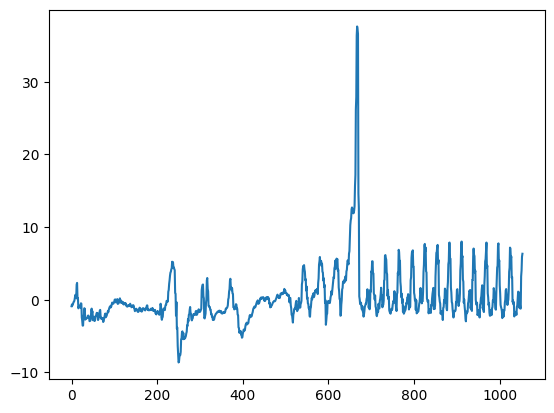

In [126]:
plt.plot(df['AcX'])

In [127]:
df.at[0, 'Roll'] = 45.01
xx = xx[:df.shape[0]]
yy = yy[:df.shape[0]]
df['x_axis'] = xx
df['y_axis'] = yy

df

,Seq,Stamp,TimeUS,Roll,Pitch,Yaw,Alt,Lat,Lng,C1_Roll,...,seq2,TimeUS2,GrX,GrY,GrZ,AcX,AcY,AcZ,x_axis,y_axis
0,198,17:34.2,179654476,45.01,-5.59,61.29,-12.06,22.555598,88.308273,1500,...,176,179651838,-1.019486,0.031180,-0.764695,-0.897181,-7.478602,-7.713443,17241.686227,2.501919e+06
1,423,17:34.2,179697878,42.66,-4.62,60.23,-12.07,22.555598,88.308274,1500,...,177,179651838,-1.059048,0.006570,-0.785094,-0.644817,-7.397454,-8.110314,17241.881340,2.501919e+06
2,649,17:34.3,179733964,40.29,-3.70,59.38,-12.07,22.555598,88.308274,1500,...,282,179671952,-1.035036,0.020322,-0.694925,-0.791456,-8.410787,-8.229849,17241.881340,2.501919e+06
3,879,17:34.3,179774486,37.83,-2.72,58.68,-12.07,22.555598,88.308274,1500,...,283,179671952,-1.068217,0.006879,-0.715840,-0.620993,-8.345556,-8.458950,17241.881340,2.501919e+06
4,1109,17:34.4,179841066,35.23,-1.15,58.16,-12.07,22.555598,88.308274,1500,...,398,179693751,-1.121045,-0.015521,-0.610481,-0.423526,-8.455116,-8.509775,17241.881340,2.501919e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,40351,18:16.2,221678836,-2.14,1.72,24.72,-1.70,22.555625,88.308345,1507,...,11454,190294706,0.310023,0.938959,-0.187948,-1.212563,1.143817,-25.578570,17249.209358,2.501922e+06
1050,40386,18:16.3,221717811,-0.84,-1.76,19.31,-1.70,22.555625,88.308345,1508,...,11455,190314541,-0.486446,0.160412,-0.114451,3.222649,-0.365631,-33.076530,17249.209358,2.501922e+06
1051,40425,18:16.3,221758761,12.54,-2.35,14.11,-1.70,22.555625,88.308345,1508,...,11456,190314541,-0.443253,0.176483,-0.131657,4.018771,-0.280683,-31.800740,17249.209358,2.501922e+06
1052,40460,18:16.3,221796964,27.96,1.52,12.23,-1.70,22.555625,88.308345,1508,...,11488,190334519,-0.655319,-0.476875,0.071297,5.924641,0.018187,-25.114600,17249.209358,2.501922e+06


**Max_Min Value**


In [128]:
Roll_max=45
Roll_min=-45
Pitch_min=-45
Pitch_max=45
Yaw_min=0
Yaw_max=360
C_min=900
C_max=2100


**Data Normalization**

In [129]:
df['Roll']=(df['Roll']-Roll_min)/(Roll_max-Roll_min)
df['Pitch']=(df['Pitch']-Pitch_min)/(Pitch_max-Pitch_min)
df['Yaw']=(df['Yaw']-Yaw_min)/(Yaw_max-Yaw_min)
df['C1_Roll']=(df['C1_Roll']-C_min)/(C_max-C_min)
df['C2_Pitch']=(df['C2_Pitch']-C_min)/(C_max-C_min)
df['C3_Throttle']=(df['C3_Throttle']-C_min)/(C_max-C_min)

In [130]:

df['Roll_diff']= df['Roll'].shift(-1) - df['Roll']
df['Pitch_diff'] = df['Pitch'].shift(-1) - df['Pitch']
df['Yaw_diff'] = df['Yaw'].shift(-1) - df['Yaw']
df['TimeUS_diff'] = df['TimeUS'].shift(-1) - df['TimeUS']
df['x_axis_diff'] = df['x_axis'].shift(-1) - df['x_axis']
df['y_axis_diff'] = df['y_axis'].shift(-1) - df['y_axis']
df['Alt_diff'] = df['Alt'].shift(-1) - df['Alt']

In [131]:
#offset
df['x_axis'] = df['x_axis']-df['x_axis'][0]
df['y_axis'] = df['y_axis']-df['y_axis'][0]
df['Alt'] = df['Alt']-df['Alt'][0]
df['TimeUS'] = df['TimeUS']-df['TimeUS'][0]

df.dropna(inplace=True)
df

,Seq,Stamp,TimeUS,Roll,Pitch,Yaw,Alt,Lat,Lng,C1_Roll,...,AcZ,x_axis,y_axis,Roll_diff,Pitch_diff,Yaw_diff,TimeUS_diff,x_axis_diff,y_axis_diff,Alt_diff
0,198,17:34.2,0,1.000111,0.437889,0.170250,0.00,22.555598,88.308273,0.500000,...,-7.713443,0.000000,0.000000,-0.026111,0.010778,-0.002944,43402.0,0.195114,-0.028356,-0.01
1,423,17:34.2,43402,0.974000,0.448667,0.167306,-0.01,22.555598,88.308274,0.500000,...,-8.110314,0.195114,-0.028356,-0.026333,0.010222,-0.002361,36086.0,0.000000,0.000000,0.00
2,649,17:34.3,79488,0.947667,0.458889,0.164944,-0.01,22.555598,88.308274,0.500000,...,-8.229849,0.195114,-0.028356,-0.027333,0.010889,-0.001944,40522.0,0.000000,0.000000,0.00
3,879,17:34.3,120010,0.920333,0.469778,0.163000,-0.01,22.555598,88.308274,0.500000,...,-8.458950,0.195114,-0.028356,-0.028889,0.017444,-0.001444,66580.0,0.000000,0.000000,0.00
4,1109,17:34.4,186590,0.891444,0.487222,0.161556,-0.01,22.555598,88.308274,0.500000,...,-8.509775,0.195114,-0.028356,-0.015000,-0.001111,-0.001556,71659.0,0.084194,0.052883,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,40309,18:16.2,41981884,0.563333,0.586000,0.081500,10.17,22.555619,88.308340,0.506667,...,-24.516720,7.071420,2.120909,-0.087111,-0.066889,-0.012833,42476.0,0.451711,0.585544,0.19
1049,40351,18:16.2,42024360,0.476222,0.519111,0.068667,10.36,22.555625,88.308345,0.505833,...,-25.578570,7.523131,2.706454,0.014444,-0.038667,-0.015028,38975.0,0.000000,0.000000,0.00
1050,40386,18:16.3,42063335,0.490667,0.480444,0.053639,10.36,22.555625,88.308345,0.506667,...,-33.076530,7.523131,2.706454,0.148667,-0.006556,-0.014444,40950.0,0.000000,0.000000,0.00
1051,40425,18:16.3,42104285,0.639333,0.473889,0.039194,10.36,22.555625,88.308345,0.506667,...,-31.800740,7.523131,2.706454,0.171333,0.043000,-0.005222,38203.0,0.000000,0.000000,0.00


In [132]:
#Rearrange Coloumn Dataframe
df=df[['TimeUS_diff','Roll','Pitch','Yaw','x_axis','y_axis','Alt','GrX','GrY','GrZ','AcX','AcY','AcZ','C1_Roll','C2_Pitch','C3_Throttle']]

#df['vx']=df['AcX']*df['TimeUS_diff']

In [133]:
#normalization of X,Y,Z axis

df['x_norm']=(df['x_axis']-df['x_axis'].min())/(df['x_axis'].max()-df['x_axis'].min())
df['y_norm']=(df['y_axis']-df['y_axis'].min())/(df['y_axis'].max()-df['y_axis'].min())
df['Alt_norm']=(df['Alt']-df['Alt'].min())/(df['Alt'].max()-df['Alt'].min())

df

<ipython-input-133-ec49729cc056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_norm']=(df['x_axis']-df['x_axis'].min())/(df['x_axis'].max()-df['x_axis'].min())
<ipython-input-133-ec49729cc056>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_norm']=(df['y_axis']-df['y_axis'].min())/(df['y_axis'].max()-df['y_axis'].min())
<ipython-input-133-ec49729cc056>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,TimeUS_diff,Roll,Pitch,Yaw,x_axis,y_axis,Alt,GrX,GrY,GrZ,AcX,AcY,AcZ,C1_Roll,C2_Pitch,C3_Throttle,x_norm,y_norm,Alt_norm
0,43402.0,1.000111,0.437889,0.170250,0.000000,0.000000,0.00,-1.019486,0.031180,-0.764695,-0.897181,-7.478602,-7.713443,0.500000,0.500000,0.072500,0.371276,0.118407,0.329884
1,36086.0,0.974000,0.448667,0.167306,0.195114,-0.028356,-0.01,-1.059048,0.006570,-0.785094,-0.644817,-7.397454,-8.110314,0.500000,0.500000,0.072500,0.377147,0.117695,0.329237
2,40522.0,0.947667,0.458889,0.164944,0.195114,-0.028356,-0.01,-1.035036,0.020322,-0.694925,-0.791456,-8.410787,-8.229849,0.500000,0.500000,0.072500,0.377147,0.117695,0.329237
3,66580.0,0.920333,0.469778,0.163000,0.195114,-0.028356,-0.01,-1.068217,0.006879,-0.715840,-0.620993,-8.345556,-8.458950,0.500000,0.500000,0.072500,0.377147,0.117695,0.329237
4,71659.0,0.891444,0.487222,0.161556,0.195114,-0.028356,-0.01,-1.121045,-0.015521,-0.610481,-0.423526,-8.455116,-8.509775,0.500000,0.500000,0.072500,0.377147,0.117695,0.329237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,42476.0,0.563333,0.586000,0.081500,7.071420,2.120909,10.17,0.290138,0.926974,-0.176806,-1.221395,0.703216,-24.516720,0.506667,0.501667,0.700000,0.584052,0.171633,0.987710
1049,38975.0,0.476222,0.519111,0.068667,7.523131,2.706454,10.36,0.310023,0.938959,-0.187948,-1.212563,1.143817,-25.578570,0.505833,0.500833,0.700000,0.597644,0.186327,1.000000
1050,40950.0,0.490667,0.480444,0.053639,7.523131,2.706454,10.36,-0.486446,0.160412,-0.114451,3.222649,-0.365631,-33.076530,0.506667,0.500000,0.692500,0.597644,0.186327,1.000000
1051,38203.0,0.639333,0.473889,0.039194,7.523131,2.706454,10.36,-0.443253,0.176483,-0.131657,4.018771,-0.280683,-31.800740,0.506667,0.500000,0.686667,0.597644,0.186327,1.000000


In [134]:
np.mean((df['TimeUS_diff']))

40059.282051282054

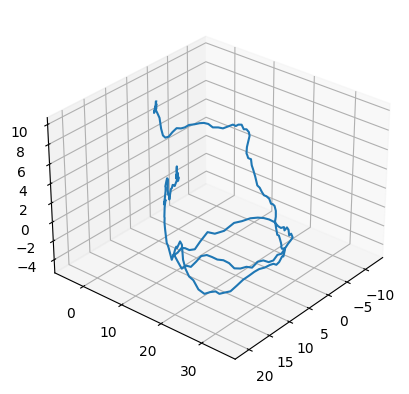

In [135]:
from mpl_toolkits.mplot3d import Axes3D

# Your data loading code
x = df['x_axis']
y = df['y_axis']
z = df['Alt']

# Create the figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot your 3D line
ax.plot(x, y, z, label='3D Line')


def change_view(elevation, azimuth):
    ax.view_init(elev=elevation, azim=azimuth)
    fig.canvas.draw_idle()

# Example: Change to a specific view
change_view(30, 40)

# Show the plot
plt.show()

**Learning**

In [136]:
# for i in range(len(df)):
#   df[1]/df[i],df[2]/df[i],df[3]/df[i],df[4]/df[i],df[5]/df[i]

In [137]:

#X = df[['TimeUS_diff','Roll','Roll_diff','Pitch','Pitch_diff','Yaw','Yaw_diff','x_axis','x_axis_diff','y_axis','y_axis_diff','Alt','Alt_diff']]
X = df[['TimeUS_diff','Roll','Pitch','Yaw','x_norm','y_norm','Alt_norm']]
#X = df[['TimeUS_diff','GrX','GrY','GrZ','AcX','AcY','AcZ']]
y = df[['C1_Roll','C2_Pitch','C3_Throttle']]


In [138]:
# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#time Series Split
training_size=int(len(df)*0.65)
X_train,X_test=df.loc[:training_size,['TimeUS_diff','Roll','Pitch','Yaw','x_norm','y_norm','Alt_norm']],df.loc[training_size:,['TimeUS_diff','Roll','Pitch','Yaw','x_norm','y_norm','Alt_norm']]
y_train,y_test=df.loc[:training_size,['C1_Roll','C2_Pitch','C3_Throttle']],df.loc[training_size:,['C1_Roll','C2_Pitch','C3_Throttle']]

In [139]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(7,)))  # Input layer, 32 neurons
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden Layer
model.add(Dense(3, activation='linear'))  # Output layer with 3 neurons (matching your output parameters)


In [140]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])


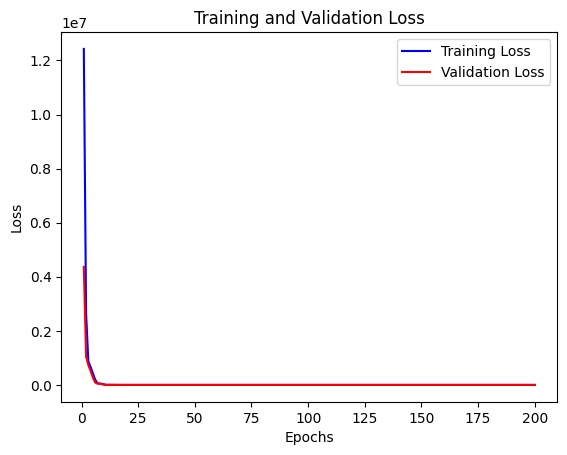

In [141]:
history=model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_test, y_test),verbose=0)


training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)  # Assuming you trained for 1000 epochs

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [142]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.0317891463637352
Test accuracy: 0.6097561120986938


In [ ]:
X_new=[[40000,0.4,0.2,0.5,0.4,0.2,0.3]]
predictions = model.predict(X_new)
print(predictions)

1/1 [==============================] - 0s 118ms/step
[[1. 1. 1.]]


# Offset from real Data

,Unnamed: 0,TimeUS_diff,Roll,Pitch,Yaw,x_axis,y_axis,Alt,GrX,GrY,GrZ,AcX,AcY,AcZ,C1_Roll,C2_Pitch,C3_Throttle,x_norm,y_norm,Alt_norm
0,0,43402.0,1.100111,0.537889,0.270250,0.000000,0.000000,0.00,-1.019486,0.031180,-0.764695,-0.897181,-7.478602,-7.713443,0.500000,0.500000,0.072500,0.471276,0.218407,0.429884
1,1,36086.0,1.074000,0.548667,0.267306,0.195114,-0.028356,-0.01,-1.059048,0.006570,-0.785094,-0.644817,-7.397454,-8.110314,0.500000,0.500000,0.072500,0.477147,0.217695,0.429237
2,2,40522.0,1.047667,0.558889,0.264944,0.195114,-0.028356,-0.01,-1.035036,0.020322,-0.694925,-0.791456,-8.410787,-8.229849,0.500000,0.500000,0.072500,0.477147,0.217695,0.429237
3,3,66580.0,1.020333,0.569778,0.263000,0.195114,-0.028356,-0.01,-1.068217,0.006879,-0.715840,-0.620993,-8.345556,-8.458950,0.500000,0.500000,0.072500,0.477147,0.217695,0.429237
4,4,71659.0,0.991444,0.587222,0.261556,0.195114,-0.028356,-0.01,-1.121045,-0.015521,-0.610481,-0.423526,-8.455116,-8.509775,0.500000,0.500000,0.072500,0.477147,0.217695,0.429237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,1048,42476.0,0.663333,0.686000,0.181500,7.071420,2.120909,10.17,0.290138,0.926974,-0.176806,-1.221395,0.703216,-24.516720,0.506667,0.501667,0.700000,0.684052,0.271633,1.087710
1049,1049,38975.0,0.576222,0.619111,0.168667,7.523131,2.706454,10.36,0.310023,0.938959,-0.187948,-1.212563,1.143817,-25.578570,0.505833,0.500833,0.700000,0.697644,0.286327,1.100000
1050,1050,40950.0,0.590667,0.580444,0.153639,7.523131,2.706454,10.36,-0.486446,0.160412,-0.114451,3.222649,-0.365631,-33.076530,0.506667,0.500000,0.692500,0.697644,0.286327,1.100000
1051,1051,38203.0,0.739333,0.573889,0.139194,7.523131,2.706454,10.36,-0.443253,0.176483,-0.131657,4.018771,-0.280683,-31.800740,0.506667,0.500000,0.686667,0.697644,0.286327,1.100000


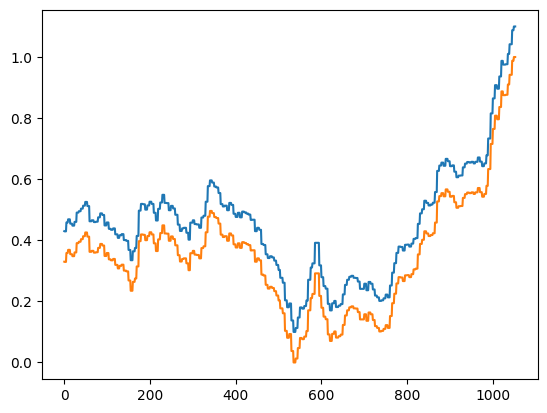

In [179]:
df2=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/normBird_data')
delta=0.1
df2['Roll'] = df2['Roll'] + delta
df2['Pitch'] = df2['Pitch'] + delta
df2['Yaw'] = df2['Yaw'] + delta
df2['x_norm']=df2['x_norm']+delta
df2['y_norm']=df2['y_norm']+delta
df2['Alt_norm']=df2['Alt_norm']+delta


plt.plot(df2['Alt_norm'])
plt.plot(df['Alt_norm'])
df2

33/33 [==============================] - 0s 1ms/step
[[0.65899366 0.6194113  0.54427963]
 [0.6169252  0.5065573  0.4126878 ]
 [0.6430177  0.5697287  0.5008226 ]
 ...
 [0.6210298  0.5880392  0.5098558 ]
 [0.6138124  0.5558737  0.4378343 ]
 [0.64611524 0.5826681  0.45394757]]


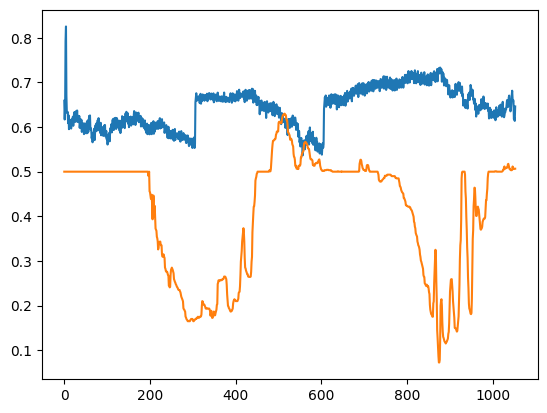

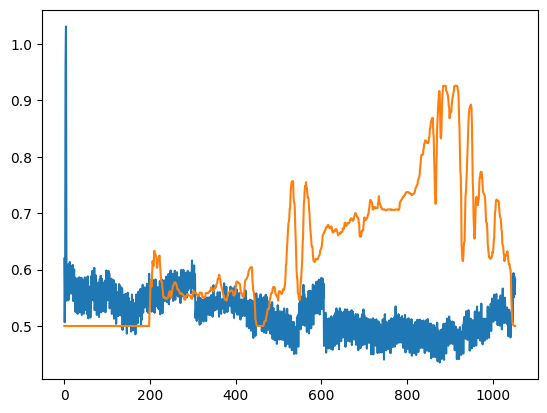

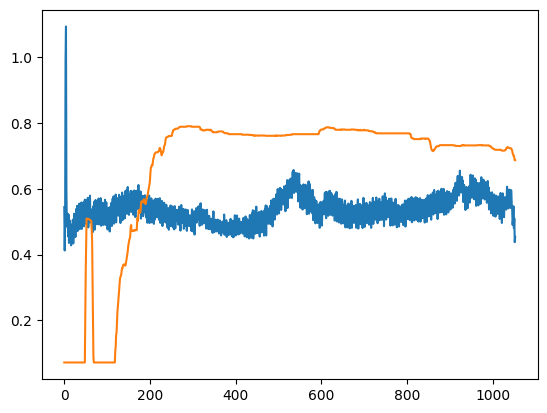

In [178]:
df_test=df2[['TimeUS_diff','Roll','Pitch','Yaw','x_norm','y_norm','Alt_norm']]
predictions = model.predict(df_test)
print(predictions)
plt.plot(predictions[:,0])
plt.plot(df['C1_Roll'])
plt.show()
plt.plot(predictions[:,1])
plt.plot(df['C2_Pitch'])
plt.show()
plt.plot(predictions[:,2])
plt.plot(df['C3_Throttle'])
#plt.plot(predictions[:,1])
#plt.plot(predictions[:,2])

# offSet Trajectory

# Testing Curves



Spiral

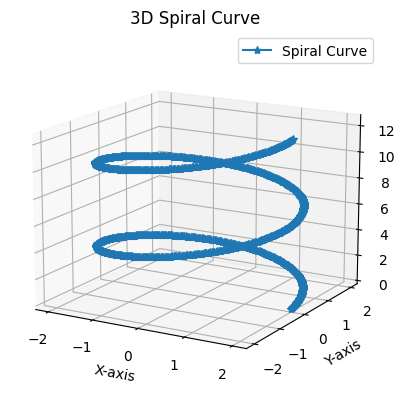

In [ ]:


# Define parameters for the spiral
theta = np.linspace(0, 4*np.pi, 1000)  # 1000 data points
a = 2  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.cos( theta )
y = a * np.sin(theta)
z = b * theta

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Spiral Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=15, azim=-60)  # Example view angles

plt.show()



In [ ]:
df_sp=pd.DataFrame(columns=['TimeUS','Roll','Pitch','Yaw','x_ax','y_ax','Alt'],index=range(1000))
df_sp['x_ax']=x
df_sp['y_ax']=y
df_sp['Alt']=z
df_sp['TimeUS']=40000 #0.04 seconds data aquation rate
df_sp['Roll']=0
df_sp['Pitch']=0.5
df_sp['Yaw']=0.5
df_sp


,TimeUS,Roll,Pitch,Yaw,x_ax,y_ax,Alt
0,40000,0,0.5,0.5,2.000000,0.000000e+00,0.000000
1,40000,0,0.5,0.5,1.999842,2.515724e-02,0.012579
2,40000,0,0.5,0.5,1.999367,5.031049e-02,0.025158
3,40000,0,0.5,0.5,1.998576,7.545579e-02,0.037737
4,40000,0,0.5,0.5,1.997469,1.005891e-01,0.050316
...,...,...,...,...,...,...,...
995,40000,0,0.5,0.5,1.997469,-1.005891e-01,12.516055
996,40000,0,0.5,0.5,1.998576,-7.545579e-02,12.528634
997,40000,0,0.5,0.5,1.999367,-5.031049e-02,12.541213
998,40000,0,0.5,0.5,1.999842,-2.515724e-02,12.553792


32/32 [==============================] - 0s 3ms/step
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


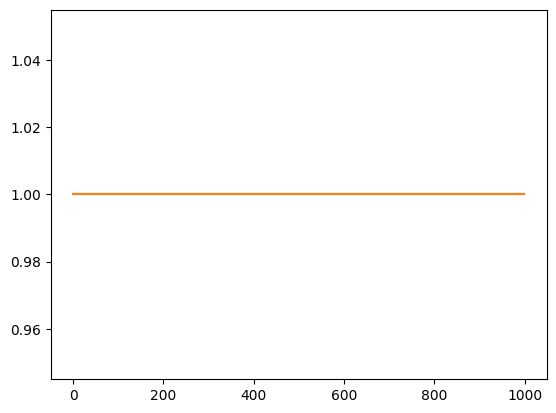

In [ ]:
predictions = model.predict(df_sp)
print(predictions)
plt.plot(predictions[:,0])
plt.plot(predictions[:,1])
#plt.plot(predictions[:,2])

Circle

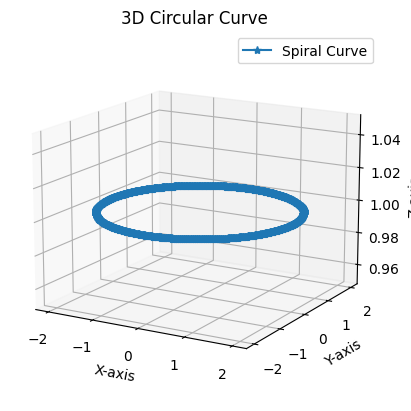

In [ ]:

theta = np.linspace(0, 4*np.pi, 1000)  # 1000 data points
a = 2  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.cos( theta )
y = a * np.sin(theta)
z = b

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Circular Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=15, azim=-60)

plt.show()

sine curve

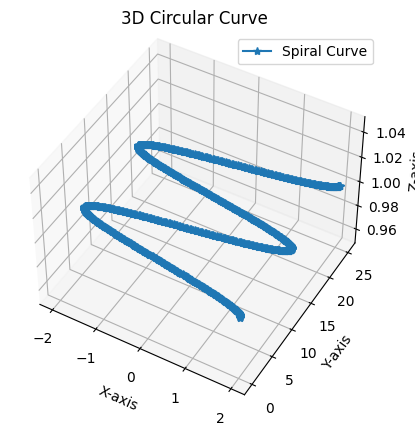

In [ ]:
theta = np.linspace(0, 4*np.pi, 1000)  # 1000 data points
a = 2  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.cos( theta )
y = a * theta
z = b

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Circular Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=45, azim=-60)  # Example view angles

plt.show()

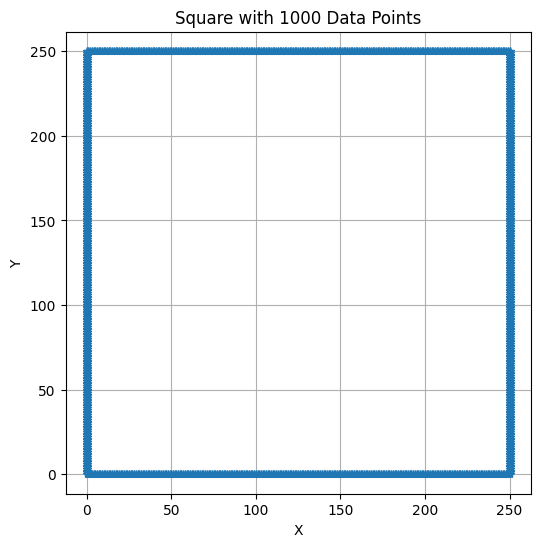

In [ ]:
import matplotlib.pyplot as plt

# Define the size of the square
side_length = 250  # Adjust as needed

# Generate the coordinates for the square
x = []
y = []

# Top side
x.extend(range(0, side_length))
y.extend([0] * side_length)

# Right side
x.extend([side_length] * side_length)
y.extend(range(0, side_length))

# Bottom side
x.extend(range(side_length, 0, -1))
y.extend([side_length] * side_length)

# Left side
x.extend([0] * side_length)
y.extend(range(side_length, 0, -1))

# Plot the square
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.plot(x, y,'*')  # 'bo' for blue circles, you can change marker style and color
plt.title('Square with 1000 Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')  # Ensure aspect ratio is equal
plt.grid(True)
plt.show()


In [ ]:

df_s=pd.DataFrame(columns=['TimeUS','Roll','Pitch','Yaw','x_ax','y_ax','Alt'],index=range(1000))
df_s['x_ax']=x
df_s['y_ax']=y
df_s['Alt']=1
df_s['TimeUS']=40000 #0.04 seconds data aquation rate
df_s['Roll']=0
df_s['Pitch']=0
df_s['Yaw']=0

df_s.at[250, 'Yaw'] = 0.25
df_s.at[500, 'Yaw'] = 0.25
df_s.at[750, 'Yaw'] = 0.25

df_s
predictions = model.predict(df_s)
print(predictions)


32/32 [==============================] - 0s 2ms/step
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


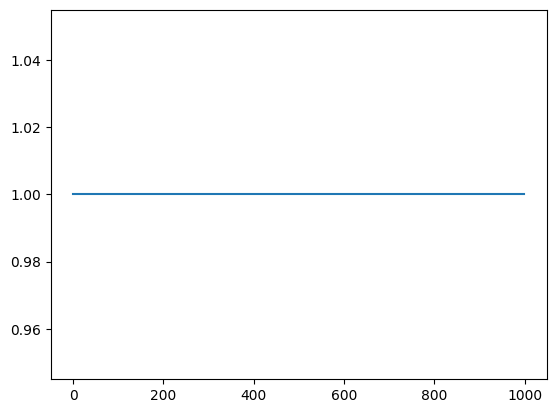

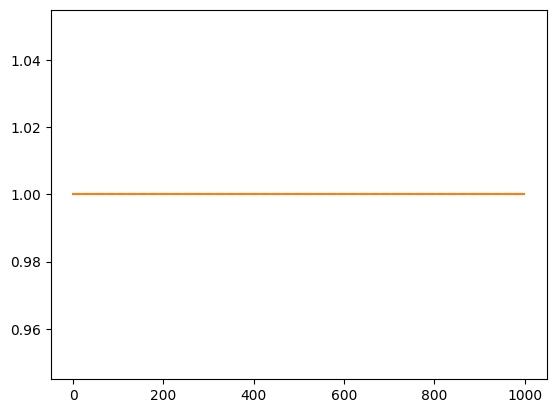

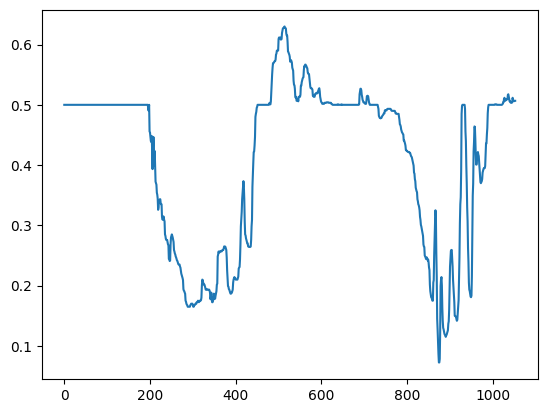

In [ ]:
plt.plot(predictions[:,0],'-')
plt.show()
plt.plot(predictions[:,1],'--')
plt.plot(predictions[:,2])
plt.show()
plt.plot(df['C1_Roll'])